# Circuit simulation

You can describe a component linear response with its [Scattering parameters](https://en.wikipedia.org/wiki/Scattering_parameters)

The Scattering matrix of a component can be simulated with electromagnetic methods such as Finite difference time domain (FDTD)

[Simphony](https://simphonyphotonics.readthedocs.io/en/latest/) open source package provides you with some of the the circuit linear solver to solve the circuit response of several components connected in a circuit. Simphony also has some of the UBC models built-in.

For some components not available in simphony you can leverage gdsfactory FDTD lumerical interface to compute the Sparameters of a component.


## Component models

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from simphony.library import ebeam

import gdsfactory as gf
import gdsfactory.simulation.simphony as gs
import ubcpdk
import ubcpdk.simulation.circuits_simphony as cm

2022-02-14 11:59:28.958 | INFO     | gdsfactory.config:<module>:52 - Load '/home/jmatres/gdsfactory/gdsfactory' 4.1.6
2022-02-14 11:59:29.942790: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-14 11:59:29.942813: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-02-14 11:59:31.455 | INFO     | ubcpdk:<module>:27 - Found UBCpdk '1.1.1' installed at PosixPath('/home/jmatres/ubc/ubcpdk')


2022-02-14 11:58:40.101 | INFO     | gdsfactory.show:show:36 - Klayout show ebeam_bdc_te1550: uid 1, ports ['o4', 'o3', 'o2', 'o1'], aliases [], 19 polygons, 0 references


ebeam_bdc_te1550: uid 1, ports ['o4', 'o3', 'o2', 'o1'], aliases [], 19 polygons, 0 references


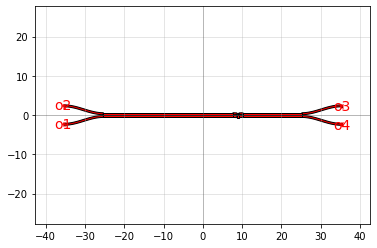

ebeam_bdc_te1550: uid 1, ports ['o4', 'o3', 'o2', 'o1'], aliases [], 19 polygons, 0 references

In [5]:
ubcpdk.components.dc_broadband_te()

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

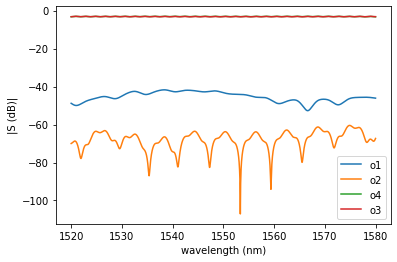

In [6]:
c = cm.ebeam_bdc_te1550()
gs.plot_model(c)

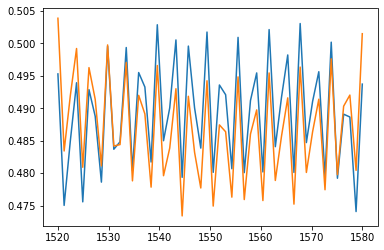

In [7]:
bdc = cm.ebeam_bdc_te1550()
w = np.linspace(1520, 1580) * 1e-9
f = 3e8 / w
s = bdc.s_parameters(freq=f)
plt.plot(w * 1e9, np.abs(s[:, 0, 2]) ** 2)
plt.plot(w * 1e9, np.abs(s[:, 0, 3]) ** 2)

2022-02-14 11:58:40.980 | INFO     | gdsfactory.show:show:36 - Klayout show ebeam_y_1550: uid 11, ports ['o2', 'o3', 'o1'], aliases [], 18 polygons, 0 references


ebeam_y_1550: uid 11, ports ['o2', 'o3', 'o1'], aliases [], 18 polygons, 0 references


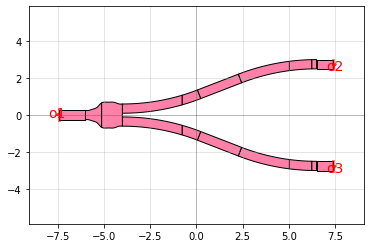

ebeam_y_1550: uid 11, ports ['o2', 'o3', 'o1'], aliases [], 18 polygons, 0 references

In [8]:
ubcpdk.components.y_splitter()

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

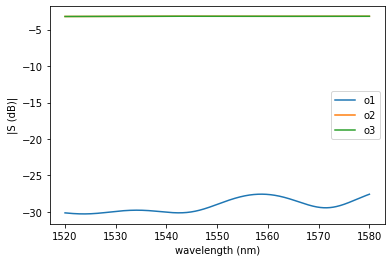

In [9]:
c = cm.ebeam_y_1550()
gs.plot_model(c)

2022-02-14 11:58:42.194 | INFO     | gdsfactory.show:show:36 - Klayout show coupler_ring: uid 2, ports ['o2', 'o1', 'o3', 'o4'], aliases [], 6 polygons, 0 references


coupler_ring: uid 2, ports ['o2', 'o1', 'o3', 'o4'], aliases [], 6 polygons, 0 references


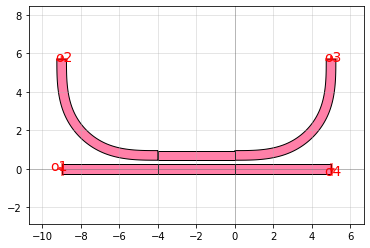

coupler_ring: uid 2, ports ['o2', 'o1', 'o3', 'o4'], aliases [], 6 polygons, 0 references

In [10]:
ubcpdk.components.ebeam_dc_halfring_straight()

/home/jmatres/mambaforge/lib/python3.9/site-packages/simphony/library/siepic/__init__.py:440: UserWarning: Exact parameters not available for '<class 'simphony.library.siepic.ebeam_dc_halfring_straight'>', using closest approximation (results may not be as accurate).
Requested: {'gap': 3e-08, 'radius': 1e-05, 'width': 5e-07, 'thickness': 2.2e-07, 'couple_length': 0.0}
Selected:  {'gap': 1e-07, 'radius': 1e-05, 'width': 5e-07, 'thickness': 2.2e-07, 'couple_length': 0.0}
NOTE: Model attributes may have been automatically modified.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

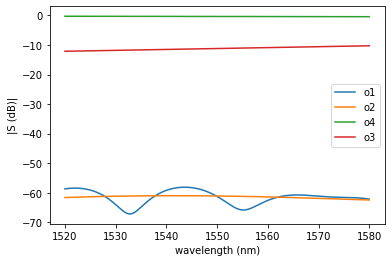

In [11]:
c = cm.ebeam_dc_halfring_straight()
gs.plot_model(c)

2022-02-14 11:59:46.843 | INFO     | gdsfactory.show:show:36 - Klayout show coupler: uid 1, ports ['o1', 'o2', 'o3', 'o4'], aliases [], 6 polygons, 0 references


coupler: uid 1, ports ['o1', 'o2', 'o3', 'o4'], aliases [], 6 polygons, 0 references


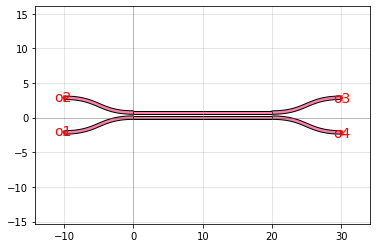

coupler: uid 1, ports ['o1', 'o2', 'o3', 'o4'], aliases [], 6 polygons, 0 references

In [3]:
ubcpdk.components.ebeam_dc_te1550()

<AxesSubplot:xlabel='wavelength (nm)', ylabel='|S (dB)|'>

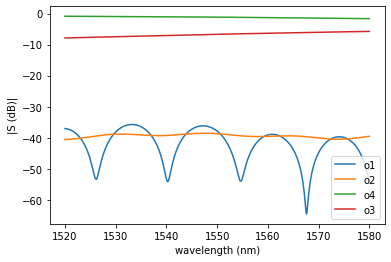

In [4]:
c = cm.ebeam_dc_te1550()
gs.plot_model(c)

## Circuit simulations

We can also do some circuit simulations.

2022-02-14 11:59:54.900 | INFO     | gdsfactory.show:show:36 - Klayout show mzi_686be344: uid 10, ports ['o1', 'o2'], aliases [], 0 polygons, 20 references


mzi_686be344: uid 10, ports ['o1', 'o2'], aliases [], 0 polygons, 20 references


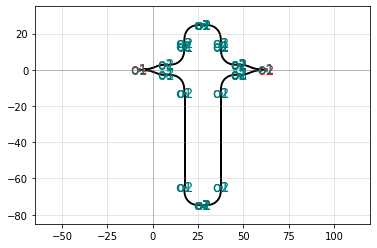

mzi_686be344: uid 10, ports ['o1', 'o2'], aliases [], 0 polygons, 20 references

In [5]:
ubcpdk.components.mzi(delta_length=100)

2022-02-14 11:59:55.798 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])
2022-02-14 11:59:55.798 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


<AxesSubplot:title={'center':'mzi'}, xlabel='wavelength (nm)', ylabel='|S|'>

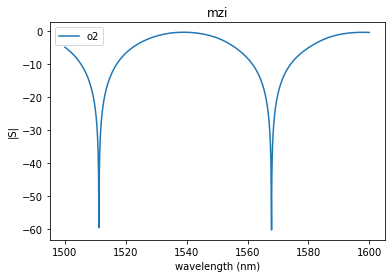

In [6]:
circuit_mzi =cm.mzi(delta_length=10)
gs.plot_circuit(circuit_mzi)

2022-02-14 11:59:56.487 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])
2022-02-14 11:59:56.488 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - igoring dict_keys([])


<AxesSubplot:title={'center':'mzi'}, xlabel='wavelength (nm)', ylabel='|S|'>

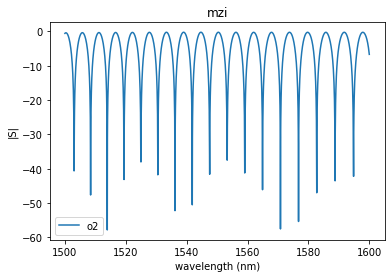

In [7]:
circuit_mzi =cm.mzi(delta_length=100)
gs.plot_circuit(circuit_mzi)